In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(np.random.randint(0,30,size=(20, 2)), columns=list('AB'))

print (df)

     A   B
0   14   8
1   18  13
2   26  15
3    9  13
4    8  23
5   17  22
6   24  26
7   21   9
8   25   9
9   14  28
10  26  19
11   0  11
12   0  26
13  18   8
14  12  10
15   8   2
16  28   9
17  22   5
18   6  22
19   6  19


In [ ]:

boxes = {'A': [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0],
         'B': [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0],
        'Label': [0,0,0,0,0, 0,0,0,0,0, 1,1,1,1,1, 1,1,1,1,1]
        }

df_train = pd.DataFrame(boxes, columns = ['A','B','Label'])
print (df_train)

np_train = df_train.values

    A  B  Label
0   0  0      0
1   0  0      0
2   0  0      0
3   0  0      0
4   0  0      0
5   0  0      0
6   0  0      0
7   0  0      0
8   0  0      0
9   0  0      0
10  0  0      1
11  0  0      1
12  0  0      1
13  0  0      1
14  0  0      1
15  0  0      1
16  0  0      1
17  0  0      1
18  0  0      1
19  0  0      1


In [ ]:
w1 = df_train[df_train['Label'] == 0]
w2 = df_train[df_train['Label'] == 1]

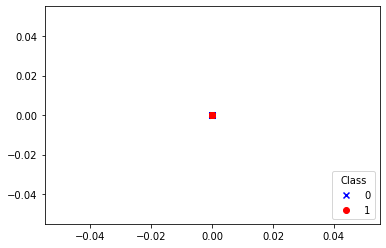

In [ ]:
fig, ax = plt.subplots()
ax.scatter(w1['A'], w1['B'], color='blue', label='0', marker='x')
ax.scatter(w1['A'], w1['B'], color='red', label='1', marker='o')
ax.legend(title='Class', loc='lower right')
plt.show()

In [ ]:
def phi_function_and_normalization(arr):
    
    A_mul_A = arr[0] * arr[0]
    A_mul_B = arr[0] * arr[1]
    B_mul_B = arr[1] * arr[1]
    A_min_B = arr[0] - arr[1]
    
    if arr[2] == 1:
        return  np.array([[A_mul_A, A_mul_B, B_mul_B, A_min_B, 0.5, 1]])
    else:
        return  np.array([[A_mul_A, A_mul_B, B_mul_B, A_min_B, 0.5, 1]]) * -1

In [ ]:
y = np.empty((0,6), float)
   
for i in range(len(np_train)):
    temp = phi_function_and_normalization(np_train[i])
    y = np.append(y, temp, axis = 0)
        
print(y) 

[[-0.  -0.  -0.  -0.  -0.5 -1. ]
 [-0.  -0.  -0.  -0.  -0.5 -1. ]
 [-0.  -0.  -0.  -0.  -0.5 -1. ]
 [-0.  -0.  -0.  -0.  -0.5 -1. ]
 [-0.  -0.  -0.  -0.  -0.5 -1. ]
 [-0.  -0.  -0.  -0.  -0.5 -1. ]
 [-0.  -0.  -0.  -0.  -0.5 -1. ]
 [-0.  -0.  -0.  -0.  -0.5 -1. ]
 [-0.  -0.  -0.  -0.  -0.5 -1. ]
 [-0.  -0.  -0.  -0.  -0.5 -1. ]
 [ 0.   0.   0.   0.   0.5  1. ]
 [ 0.   0.   0.   0.   0.5  1. ]
 [ 0.   0.   0.   0.   0.5  1. ]
 [ 0.   0.   0.   0.   0.5  1. ]
 [ 0.   0.   0.   0.   0.5  1. ]
 [ 0.   0.   0.   0.   0.5  1. ]
 [ 0.   0.   0.   0.   0.5  1. ]
 [ 0.   0.   0.   0.   0.5  1. ]
 [ 0.   0.   0.   0.   0.5  1. ]
 [ 0.   0.   0.   0.   0.5  1. ]]


In [ ]:
def one_at_a_time(y, w, alpha):
    count = 0
    itr = 0
    len_y = y.shape[0]
    
    while count != len_y:
        itr += 1
        count = 0
        
        for i in range(len_y):
            g = np.dot(y[i], np.transpose(w))
            
            if g <= 0:
                w = w + alpha * y[i]
            else:
                count += 1
 
    return itr 

In [ ]:
def many_at_a_time(y, w, alpha):
    count = 0
    itr = 0
    len_y = y.shape[0]
   
    while count != len_y:
        itr += 1
        count = 0
        y_miss = np.zeros((1, y.shape[1]))
       
        for i in range(len_y):
            g = np.dot(y[i], np.transpose(w))
            
            if g <= 0:
                y_miss = y_miss + y[i]
            else:
                count += 1
        w = w + alpha * y_miss
    
    return itr 

In [ ]:
np.random.seed(2)

# weight initializations
w_ones = np.ones((1, y.shape[1]))
w_zeros = np.zeros((1, y.shape[1]))
w_random = np.random.random((1, y.shape[1]))

# learning rate 
#alphas = np.arange(0.1, 1.1, 0.1)
alphas = np.arange(0.1, 1.1, 0.1)

#list for output
one_ones, one_zeros, one_random, many_ones, many_zeros, many_random = [], [], [], [], [], []

for alpha in alphas:
    one_ones.append( one_at_a_time(y, w_ones, alpha) )
    one_zeros.append( one_at_a_time(y, w_zeros, alpha) )
    one_random.append( one_at_a_time(y, w_random, alpha) )
    many_ones.append( many_at_a_time(y, w_ones, alpha) )
    many_zeros.append( many_at_a_time(y, w_zeros, alpha) )
    many_random.append( many_at_a_time(y, w_random, alpha) )
    
print('one at a time with wights all ones:', one_ones)
print('one at a time with wights all zeros:', one_zeros)
print('one at a time with wights randomly initialized:', one_random)
print('many at a time with wights all ones:', many_ones)
print('many at a time with wights all zeros:', many_zeros)
print('many at a time with wights randomly initialized:', many_random)